John Lucey generously VI'd our entire Y1 TF sample (see https://astro.dur.ac.uk/~jrl/DESI_TF_Y1/index.html).  How do his results compare with Julia's SSL classifications of the Y1 galaxies?

In [21]:
import numpy as np

from astropy.table import Table, join, vstack

import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3

# Import data

## Y1 TF sample

In [5]:
sgafits = 'SGA_iron_jointTFR-varyV0-perpdwarf-fitH0_zCMB0p1_moduli_pec-Watkins15.fits'

sgatab = Table.read(sgafits)

sgatab[:5]

SGA_ID,SGA_GALAXY,GALAXY,PGC,RA_LEDA,DEC_LEDA,MORPHTYPE,PA_LEDA,D25_LEDA,BA_LEDA,Z_LEDA,SB_D25_LEDA,MAG_LEDA,BYHAND,REF,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER,BRICKNAME,RA,DEC,D26,D26_REF,PA,BA,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,G_SMA50,R_SMA50,Z_SMA50,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,G_MAG_SB22,R_MAG_SB22,Z_MAG_SB22,G_MAG_SB22.5,R_MAG_SB22.5,Z_MAG_SB22.5,G_MAG_SB23,R_MAG_SB23,Z_MAG_SB23,G_MAG_SB23.5,R_MAG_SB23.5,Z_MAG_SB23.5,G_MAG_SB24,R_MAG_SB24,Z_MAG_SB24,G_MAG_SB24.5,R_MAG_SB24.5,Z_MAG_SB24.5,G_MAG_SB25,R_MAG_SB25,Z_MAG_SB25,G_MAG_SB25.5,R_MAG_SB25.5,Z_MAG_SB25.5,G_MAG_SB26,R_MAG_SB26,Z_MAG_SB26,SMA_SB22_ERR,SMA_SB22.5_ERR,SMA_SB23_ERR,SMA_SB23.5_ERR,SMA_SB24_ERR,SMA_SB24.5_ERR,SMA_SB25_ERR,SMA_SB25.5_ERR,SMA_SB26_ERR,G_MAG_SB22_ERR,R_MAG_SB22_ERR,Z_MAG_SB22_ERR,G_MAG_SB22.5_ERR,R_MAG_SB22.5_ERR,Z_MAG_SB22.5_ERR,G_MAG_SB23_ERR,R_MAG_SB23_ERR,Z_MAG_SB23_ERR,G_MAG_SB23.5_ERR,R_MAG_SB23.5_ERR,Z_MAG_SB23.5_ERR,G_MAG_SB24_ERR,R_MAG_SB24_ERR,Z_MAG_SB24_ERR,G_MAG_SB24.5_ERR,R_MAG_SB24.5_ERR,Z_MAG_SB24.5_ERR,G_MAG_SB25_ERR,R_MAG_SB25_ERR,Z_MAG_SB25_ERR,G_MAG_SB25.5_ERR,R_MAG_SB25.5_ERR,Z_MAG_SB25.5_ERR,G_MAG_SB26_ERR,R_MAG_SB26_ERR,Z_MAG_SB26_ERR,G_COG_PARAMS_MTOT,G_COG_PARAMS_M0,G_COG_PARAMS_ALPHA1,G_COG_PARAMS_ALPHA2,G_COG_PARAMS_CHI2,R_COG_PARAMS_MTOT,R_COG_PARAMS_M0,R_COG_PARAMS_ALPHA1,R_COG_PARAMS_ALPHA2,R_COG_PARAMS_CHI2,Z_COG_PARAMS_MTOT,Z_COG_PARAMS_M0,Z_COG_PARAMS_ALPHA1,Z_COG_PARAMS_ALPHA2,Z_COG_PARAMS_CHI2,ELLIPSEBIT,Z_DESI,ZERR_DESI,V_0p4R26,V_0p4R26_ERR,PHOTSYS,Z_DESI_CMB,G_MAG_SB26_CORR,R_MAG_SB26_CORR,Z_MAG_SB26_CORR,G_MAG_SB26_ERR_CORR,R_MAG_SB26_ERR_CORR,Z_MAG_SB26_ERR_CORR,MU_ZCMB,R_ABSMAG_SB26,MU_ZCMB_ERR,R_ABSMAG_SB26_ERR,DWARF,R_ABSMAG_SB26_TF,R_ABSMAG_SB26_TF_ERR,R_ABSMAG_SB26_TF_ERR_STAT,R_ABSMAG_SB26_TF_ERR_SYS,MU_TF,MU_TF_ERR,LOGDIST,LOGDIST_ERR,V_PEC,VERR_PEC
int64,bytes16,bytes29,int64,float64,float64,bytes21,float32,float32,float32,float32,float32,float32,bool,bytes13,int64,bytes35,int16,bool,float64,float64,float32,bytes8,float64,float64,float32,bytes4,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float64,float64,float64,float64,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
38,SGA-2020 38,SDSSJ140638.88+393138.1,3558705,211.66194,39.5272341,S?,81.63,0.35318315,0.37757218,0.08108376,24.72948,18.361,False,LEDA-20181114,12,SDSSJ140638.88+393138.1,1,True,211.66194,39.5272341,0.35318315,2115p395,211.66203166014844,39.52724032794356,0.41757938,SB26,82.21093,0.41431504,211.6619547015994,39.52729608884245,8.520181,5.252184,4.0750155,3.3951538,3.3006833,4.4037066,5.5453897,6.693271,7.8023033,8.999919,10.213078,11.41192,12.527382,19.246052,18.406073,17.931826,18.841032,18.092857,17.659027,18.566164,17.886087,17.47688,18.383362,17.749825,17.355968,18.261652,17.655558,17.284552,18.168955,17.588947,17.231817,18.101948,17.547142,17.20673,18.055267,17.516266,17.18719,18.023865,17.497095,17.178627,0.041267984,0.058114093,0.082968995,0.08808186,0.099526815,0.11876543,0.11355961,0.14645264,0.17035669,0.028041152,0.045385383,0.052895926,0.02822557,0.041093465,0.04698563,0.027371243,0.03824084

## Julia's SSL classifications

Galaxies are classified by the SSL into one of four categories:
1. Spiral
2. Elliptical
3. Lenticular
4. Irregular

In [3]:
ai_morphpath = '/global/cfs/cdirs/desi/science/td/pv/SGA2020/'

ai_morphcsv = ai_morphpath + 'TFY1_Classification.csv'

ai_morphtab = Table.read(ai_morphcsv)
ai_morphtab[:5]

SGA_ID,Spiral_Pred,Elliptical_Pred,Lenticular_Pred,Irregular_Pred
float64,str6,str10,str10,str9
2371.0,Other,Other,Other,Irregular
2406.0,Spiral,Other,Other,Other
4614.0,Spiral,Other,Other,Other
7707.0,Spiral,Other,Other,Other
8119.0,Spiral,Other,Other,Other


In [4]:
# Create an overall record of the SSL prediction
ai_morphtab['Predicted_Type'] = 'Undecided '

for i in range(len(ai_morphtab)):
    
    classes = ai_morphtab['Spiral_Pred', 'Elliptical_Pred', 'Lenticular_Pred', 'Irregular_Pred'][i]
    
    ai_morphtab['Predicted_Type'][i] = next(j for j in classes if j != 'Other')

### Combine Julia's morphtypes with Y1 TF sample

In [7]:
sgatab = join(sgatab, ai_morphtab['SGA_ID', 'Predicted_Type'], keys='SGA_ID', join_type='left')

# Rename Predicted_Type to MORPHTYPE_AI
sgatab['Predicted_Type'].name = 'MORPHTYPE_AI'

## John Lucey's VI results

https://astro.dur.ac.uk/~jrl/DESI_TF_Y1/index.html

In [11]:
lucey_VIpath = 'VI_JohnLucey/'

rejects = lucey_VIpath + 'REJECTS.txt'

reject_tab = Table.read(rejects, format='ascii.commented_header')
reject_tab['VI'] = 'reject'
reject_tab[:5]

SGA_ID,DESI_NAME,RA,Dec,z_desi,V_0p4R26,V_0p4R26_err,V_PEC,V_ERR_PEC,VI
int64,str22,float64,float64,float64,int64,int64,int64,int64,str6
18171,DESIXJ21105773+0109527,317.74056,1.164637,0.0903,219,1,-555,542,reject
18900,DESIXJ13403122+0437086,205.130097,4.619043,0.0224,52,2,2647,351,reject
20828,DESIXJ20452158-0505449,311.339907,-5.095804,0.0522,97,1,9894,335,reject
24403,DESIXJ13023920-0257343,195.663329,-2.959515,0.0675,222,1,-2594,411,reject
34318,DESIXJ15173290+0109051,229.38709,1.151405,0.1257,235,38,7564,7706,reject


In [12]:
reds = lucey_VIpath + 'REDS.txt'

red_tab = Table.read(reds, format='ascii.commented_header')
red_tab['VI'] = 'red'
red_tab[:5]

SGA_ID,DESI_NAME,RA,Dec,z_desi,V_0p4R26,V_0p4R26_err,V_PEC,V_ERR_PEC,VI
int64,str22,float64,float64,float64,int64,int64,int64,int64,str3
13972,DESIXJ13431524+0219406,205.813495,2.327947,0.0798,209,6,-85,1170,red
71443,DESIXJ10010932+7313060,150.288852,73.218335,0.115,642,41,-38936,2916,red
78264,DESIXJ14395976-0341578,219.998989,-3.699382,0.0585,156,11,4211,1734,red
91143,DESIXJ11174561+0227117,169.440025,2.453246,0.0303,201,15,-5246,911,red
110860,DESIXJ10485488-0042339,162.228678,-0.709403,0.0261,53,3,6508,699,red


In [13]:
faceon = lucey_VIpath + 'FACE_ON.txt'

faceon_tab = Table.read(faceon, format='ascii.commented_header')
faceon_tab['VI'] = 'face-on'
faceon_tab[:5]

SGA_ID,DESI_NAME,RA,Dec,z_desi,V_0p4R26,V_0p4R26_err,V_PEC,V_ERR_PEC,VI
int64,str22,float64,float64,float64,int64,int64,int64,int64,str7
2101,DESIXJ10343883+0300202,158.661791,3.005598,0.0716,170,1,-1975,401,face-on
5958,DESIXJ14233131+5255240,215.880443,52.923323,0.1058,35,2,64740,3284,face-on
7813,DESIXJ09230080+0631513,140.753332,6.530916,0.0616,176,4,-423,621,face-on
8240,DESIXJ12481358+5859414,192.056588,58.994822,0.0432,58,3,4494,1114,face-on
12657,DESIXJ16001270+3353171,240.052925,33.88808,0.0586,101,0,10585,315,face-on


In [15]:
VI_tab = vstack([reject_tab, red_tab, faceon_tab])
VI_tab[:5]

SGA_ID,DESI_NAME,RA,Dec,z_desi,V_0p4R26,V_0p4R26_err,V_PEC,V_ERR_PEC,VI
int64,str22,float64,float64,float64,int64,int64,int64,int64,str7
18171,DESIXJ21105773+0109527,317.74056,1.164637,0.0903,219,1,-555,542,reject
18900,DESIXJ13403122+0437086,205.130097,4.619043,0.0224,52,2,2647,351,reject
20828,DESIXJ20452158-0505449,311.339907,-5.095804,0.0522,97,1,9894,335,reject
24403,DESIXJ13023920-0257343,195.663329,-2.959515,0.0675,222,1,-2594,411,reject
34318,DESIXJ15173290+0109051,229.38709,1.151405,0.1257,235,38,7564,7706,reject


### Combine John's results with Y1 TF sample

In [16]:
sgatab = join(sgatab, VI_tab['SGA_ID', 'VI'], keys='SGA_ID', join_type='left')

# Rename VI column to JOHN_VI
sgatab['VI'].name = 'JOHN_VI'

# Sample statistics

In [28]:
# Galaxies that SSL says are spirals
ssl_spiral = sgatab['MORPHTYPE_AI'] == 'Spiral'

# Galaxies that SSL says are lenticulars
ssl_lenticular = sgatab['MORPHTYPE_AI'] == 'Lenticular'

# Galaxies that SSL says are ellipticals
ssl_elliptical = sgatab['MORPHTYPE_AI'] == 'Elliptical'

# Galaxies that SSL says are irregular
ssl_irregular = sgatab['MORPHTYPE_AI'] == 'Irregular'

In [29]:
# Galaxies that John says are red
john_red = sgatab['JOHN_VI'] == 'red'

# Galaxies that John says should be rejected
john_reject = sgatab['JOHN_VI'] == 'reject'

# Galaxies that John says are face-on (don't really care about these...)
john_faceon = sgatab['JOHN_VI'] == 'face-on'

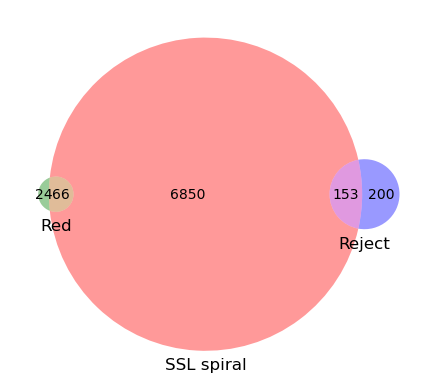

In [33]:
# Galaxies that John rejects
john_no = john_red | john_reject

# Galaxies that John rejects but SSL says are spirals
spiral_reject = ssl_spiral & john_no

# venn2(subsets=(np.sum(ssl_spiral) - np.sum(spiral_reject), 
#                np.sum(john_no) - np.sum(spiral_reject), 
#                np.sum(spiral_reject)), 
#       set_labels=('SSL spiral', 'Red or Reject')
#      );
venn3(subsets=(np.sum(ssl_spiral) - np.sum(spiral_reject), 
               np.sum(john_red) - np.sum(ssl_spiral & john_red), 
               np.sum(ssl_spiral & john_red), 
               np.sum(john_reject) - np.sum(ssl_spiral & john_reject), 
               np.sum(ssl_spiral & john_reject), 
               0, 
               0), 
      set_labels=('SSL spiral', 'Red', 'Reject')
     );

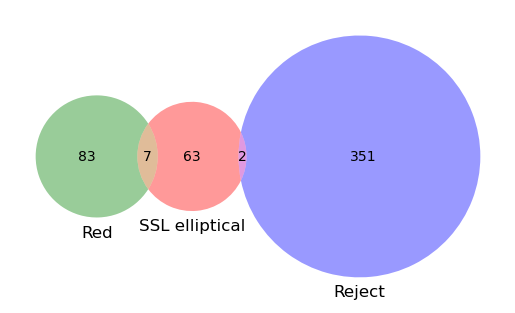

In [34]:
# Galaxies that John rejects and SSL says are ellipticals
elliptical_reject = ssl_elliptical & john_no


venn3(subsets=(np.sum(ssl_elliptical) - np.sum(elliptical_reject), 
               np.sum(john_red) - np.sum(ssl_elliptical & john_red), 
               np.sum(ssl_elliptical & john_red), 
               np.sum(john_reject) - np.sum(ssl_elliptical & john_reject), 
               np.sum(ssl_elliptical & john_reject), 
               0, 
               0), 
      set_labels=('SSL elliptical', 'Red', 'Reject')
     );

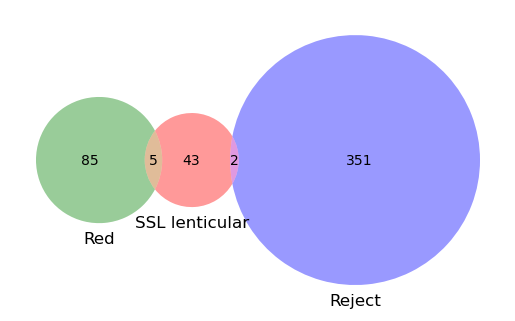

In [35]:
# Galaxies that John rejects and SSL says are lenticulars
lenticular_reject = ssl_lenticular & john_no


venn3(subsets=(np.sum(ssl_lenticular) - np.sum(lenticular_reject), 
               np.sum(john_red) - np.sum(ssl_lenticular & john_red), 
               np.sum(ssl_lenticular & john_red), 
               np.sum(john_reject) - np.sum(ssl_lenticular & john_reject), 
               np.sum(ssl_lenticular & john_reject), 
               0, 
               0), 
      set_labels=('SSL lenticular', 'Red', 'Reject')
     );

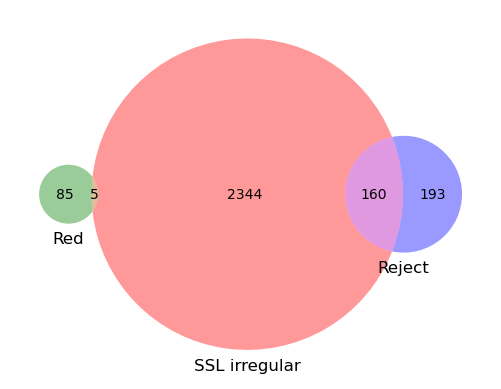

In [36]:
# Galaxies that John rejects and SSL says are irregulars
irregular_reject = ssl_irregular & john_no


venn3(subsets=(np.sum(ssl_irregular) - np.sum(irregular_reject), 
               np.sum(john_red) - np.sum(ssl_irregular & john_red), 
               np.sum(ssl_irregular & john_red), 
               np.sum(john_reject) - np.sum(ssl_irregular & john_reject), 
               np.sum(ssl_irregular & john_reject), 
               0, 
               0), 
      set_labels=('SSL irregular', 'Red', 'Reject')
     );